<a href="https://colab.research.google.com/github/Sitraka17/Learning-Data-Science/blob/main/Web%20Scrapping%20thanks%20to%20BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BeautifulSoup is THE package of webscrapping !
It's easy, fast and beautiful <3

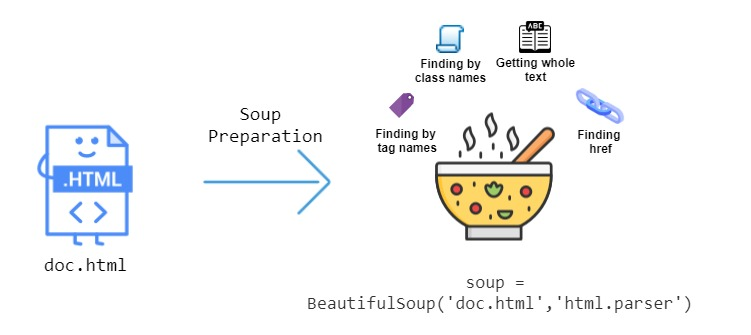

#Import

In [9]:
from bs4 import BeautifulSoup as soup  # HTML data structure
from urllib.request import urlopen as uReq  # Web client

#The Target

Now we need to search the webpage we need to "steal" the informations from :p

In [10]:
# URl to web scrap from.
# in this example we web scrap graphics cards from Newegg.com
page_url = "http://www.newegg.com/Product/ProductList.aspx?Submit=ENE&N=-1&IsNodeId=1&Description=GTX&bop=And&Page=1&PageSize=36&order=BESTMATCH"

In [11]:
# opens the connection and downloads html page from url, it donwloads the webpage
uClient = uReq(page_url)

In [12]:
# parses html into a soup data structure to traverse html
# as if it were a json data type.
page_soup = soup(uClient.read(), "html.parser")
uClient.close()

In [13]:
# finds each product from the store page
containers = page_soup.findAll("div", {"class": "item-container"})

# name the output file to write to local disk
out_filename = "graphics_cards.csv"
# header of csv file to be written
headers = "brand,product_name,shipping \n"

# opens file, and writes headers
f = open(out_filename, "w")
f.write(headers)

# loops over each product and grabs attributes about
# each product
for container in containers:
    # Finds all link tags "a" from within the first div.
    make_rating_sp = container.div.select("a")

    # Grabs the title from the image title attribute
    # Then does proper casing using .title()
    brand = make_rating_sp[0].img["title"].title()

    # Grabs the text within the second "(a)" tag from within
    # the list of queries.
    product_name = container.div.select("a")[2].text

    # Grabs the product shipping information by searching
    # all lists with the class "price-ship".
    # Then cleans the text of white space with strip()
    # Cleans the strip of "Shipping $" if it exists to just get number
    shipping = container.findAll("li", {"class": "price-ship"})[0].text.strip().replace("$", "").replace(" Shipping", "")

    # prints the dataset to console
    print("brand: " + brand + "\n")
    print("product_name: " + product_name + "\n")
    print("shipping: " + shipping + "\n")

    # writes the dataset to file
    f.write(brand + ", " + product_name.replace(",", "|") + ", " + shipping + "\n")

f.close()  # Close the file

#https://www.youtube.com/watch?v=XQgXKtPSzUI&ab_channel=DataScienceDojo wonderfull explained here !

brand: Asus

product_name: ASUS TUF Gaming GeForce GTX 1650 4GB GDDR6 PCI Express 3.0 Video Card TUF-GTX1650-O4GD6-P-GAMING

shipping: Special

brand: Msi

product_name: MSI Ventus GeForce GTX 1650 4GB GDDR6 PCI Express 3.0 x16 Video Card GTX 1650 D6 VENTUS XS OCV1

shipping: Free

brand: Gigabyte

product_name: GIGABYTE GeForce GTX 1660 OC 6G Graphics Card, 2 x WINDFORCE Fans, 6GB 192-Bit GDDR5, GV-N1660OC-6GD Video Card

shipping: 79.99

brand: Msi

product_name: MSI GeForce GTX 1650 D6 VENTUS XS OCV1 Graphics Card, PCI-E, VR & 4K HDR Ready Video Card

shipping: Free

brand: Msi

product_name: MSI Ventus GeForce GTX 1650 4GB GDDR6 PCI Express 3.0 x16 Video Card GTX 1650 D6 Ventus XS OC

shipping: Free

brand: Msi

product_name: MSI Gaming GeForce GTX 1660 SUPER 6GB GDDR6 PCI Express 3.0 x16 Video Card GTX 1660 SUPER GAMING X

shipping: Free

brand: Asus

product_name: ASUS TUF Gaming GeForce GTX 1660 SUPER Overclocked 6GB Edition HDMI DP DVI Gaming Graphics Card (TUF-GTX1660S-O6G-GAM

TypeError: ignored